1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()
x,y = my_data.data, my_data.target


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

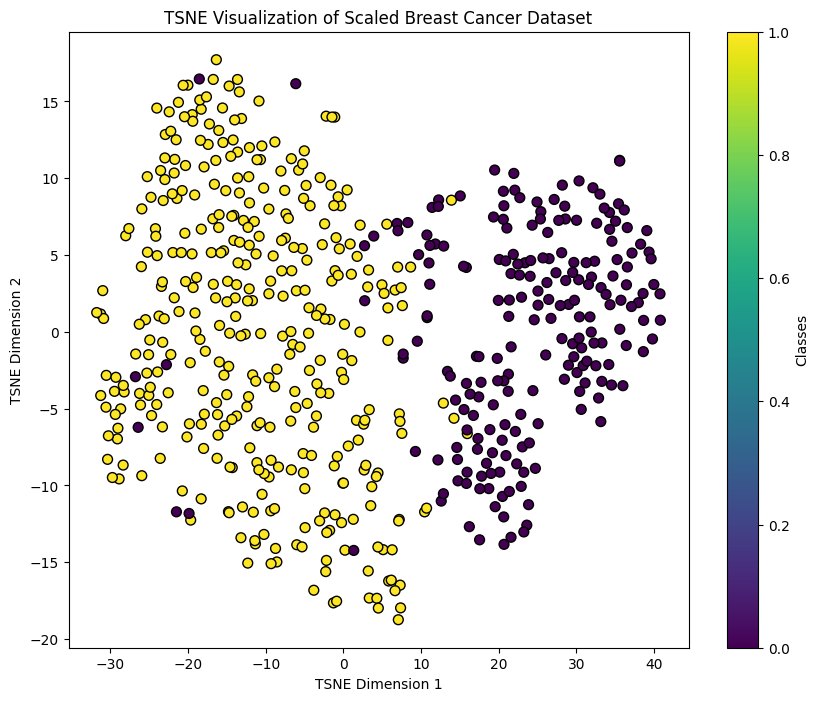

In [2]:
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

AI = []

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Scale the features


tsne = TSNE(n_components=2, random_state = 99)
x_embedded = tsne.fit_transform(x_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Classes')
plt.title("TSNE Visualization of Scaled Breast Cancer Dataset")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [3]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier( ccp_alpha = 0.015, criterion ='entropy' ,random_state = 99, max_depth = 7, min_samples_split= 10, min_samples_leaf= 3, max_features= 5)
decision_tree_model.fit(x_train, y_train)
AI.append(decision_tree_model)



5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [5]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier(random_state = 99, max_depth = 7, min_samples_split= 2, n_estimators = 200, min_samples_leaf= 1, max_features= 'sqrt', bootstrap = True, criterion = 'entropy')
Random_Forest_Classifier.fit(x_train, y_train)
AI.append(Random_Forest_Classifier)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [6]:
from sklearn.ensemble import AdaBoostClassifier

Ada_Boost_Classifier = AdaBoostClassifier(random_state = 99, estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 200, learning_rate = 0.99)
Ada_Boost_Classifier.fit(x_train, y_train)
AI.append(Ada_Boost_Classifier)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"])

for i in AI:
  y_pred = i.predict(x_test)
  model = type(i).__name__
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  ps = precision_score(y_test, y_pred)
  rs = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results_df = pd.concat([results_df, pd.DataFrame({
      "Model": [model],
      "Accuracy": [accuracy],
      "Precision": [ps],
      "Recall": [rs],
      "F1 Score": [f1],
      "Confusion Matrix": [cm]
  })], ignore_index=True)

pd.set_option('display.width', None)  # Allow full width without wrapping

print(results_df)



<ipython-input-7-fb7574debc83>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


                    Model  Accuracy  Precision    Recall  F1 Score    Confusion Matrix
0  DecisionTreeClassifier  0.991228   1.000000  0.985915  0.992908  [[43, 0], [1, 70]]
1  RandomForestClassifier  0.964912   0.958904  0.985915  0.972222  [[40, 3], [1, 70]]
2      AdaBoostClassifier  0.982456   0.972603  1.000000  0.986111  [[41, 2], [0, 71]]
